In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read train dataset
df_telecom=pd.read_csv("train.csv")

In [3]:
# read test dataset
df_test=pd.read_csv("test.csv")

In [4]:
df_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [6]:
df_telecom.shape

(69999, 172)

In [7]:
df_test.shape

(30000, 171)

### Data understanding & cleaning

In [8]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
#calculate percentage of null values in each columnscols=df_telecom.columns
cols=df_telecom.columns
for column in cols:
    percentage_null=(df_telecom[column].isnull().sum()/df_telecom.shape[0])*100
    print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

Null %  in column id = 0.0%
Null %  in column circle_id = 0.0%
Null %  in column loc_og_t2o_mou = 1.0028714695924228%
Null %  in column std_og_t2o_mou = 1.0028714695924228%
Null %  in column loc_ic_t2o_mou = 1.0028714695924228%
Null %  in column last_date_of_month_6 = 0.0%
Null %  in column last_date_of_month_7 = 0.570008142973471%
Null %  in column last_date_of_month_8 = 1.0471578165402362%
Null %  in column arpu_6 = 0.0%
Null %  in column arpu_7 = 0.0%
Null %  in column arpu_8 = 0.0%
Null %  in column onnet_mou_6 = 3.954342204888641%
Null %  in column onnet_mou_7 = 3.8386262660895154%
Null %  in column onnet_mou_8 = 5.2900755725081785%
Null %  in column offnet_mou_6 = 3.954342204888641%
Null %  in column offnet_mou_7 = 3.8386262660895154%
Null %  in column offnet_mou_8 = 5.2900755725081785%
Null %  in column roam_ic_mou_6 = 3.954342204888641%
Null %  in column roam_ic_mou_7 = 3.8386262660895154%
Null %  in column roam_ic_mou_8 = 5.2900755725081785%
Null %  in column roam_og_mou_6 = 3

In [10]:
# columns av_rech_amt_data_6 ,av_rech_amt_data_7 ,av_rech_amt_data_8 and total_rech_data_6 ,total_rech_data_7,total_rech_data_8
# these are used to derive total_recharge amount column, impute NAN for these columns with 0

df_telecom['av_rech_amt_data_6']=df_telecom['av_rech_amt_data_6'].fillna(0)
df_telecom['av_rech_amt_data_7']=df_telecom['av_rech_amt_data_7'].fillna(0)
df_telecom['av_rech_amt_data_8']=df_telecom['av_rech_amt_data_8'].fillna(0)
df_telecom['total_rech_data_6']=df_telecom['total_rech_data_6'].fillna(0)
df_telecom['total_rech_data_7']=df_telecom['total_rech_data_7'].fillna(0)
df_telecom['total_rech_data_8']=df_telecom['total_rech_data_8'].fillna(0)

In [11]:
# repeat above step for train dataset
df_test['av_rech_amt_data_6']=df_test['av_rech_amt_data_6'].fillna(0)
df_test['av_rech_amt_data_7']=df_test['av_rech_amt_data_7'].fillna(0)
df_test['av_rech_amt_data_8']=df_test['av_rech_amt_data_8'].fillna(0)
df_test['total_rech_data_6']=df_test['total_rech_data_6'].fillna(0)
df_test['total_rech_data_7']=df_test['total_rech_data_7'].fillna(0)
df_test['total_rech_data_8']=df_test['total_rech_data_8'].fillna(0)

In [12]:
#calculate percentage of null values in each columnscols=df_telecom.columns
cols=df_telecom.columns
for column in cols:
    percentage_null=(df_telecom[column].isnull().sum()/df_telecom.shape[0])*100
    print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

Null %  in column id = 0.0%
Null %  in column circle_id = 0.0%
Null %  in column loc_og_t2o_mou = 1.0028714695924228%
Null %  in column std_og_t2o_mou = 1.0028714695924228%
Null %  in column loc_ic_t2o_mou = 1.0028714695924228%
Null %  in column last_date_of_month_6 = 0.0%
Null %  in column last_date_of_month_7 = 0.570008142973471%
Null %  in column last_date_of_month_8 = 1.0471578165402362%
Null %  in column arpu_6 = 0.0%
Null %  in column arpu_7 = 0.0%
Null %  in column arpu_8 = 0.0%
Null %  in column onnet_mou_6 = 3.954342204888641%
Null %  in column onnet_mou_7 = 3.8386262660895154%
Null %  in column onnet_mou_8 = 5.2900755725081785%
Null %  in column offnet_mou_6 = 3.954342204888641%
Null %  in column offnet_mou_7 = 3.8386262660895154%
Null %  in column offnet_mou_8 = 5.2900755725081785%
Null %  in column roam_ic_mou_6 = 3.954342204888641%
Null %  in column roam_ic_mou_7 = 3.8386262660895154%
Null %  in column roam_ic_mou_8 = 5.2900755725081785%
Null %  in column roam_og_mou_6 = 3

In [13]:
df_telecom.shape

(69999, 172)

In [14]:
# Remove columns with >70% null values
null_cols=[]
for column in cols:
    percentage_null=(df_telecom[column].isnull().sum()/df_telecom.shape[0])*100
    if percentage_null> 70:
        null_cols.append(column)
null_cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [15]:
df_telecom=df_telecom.drop(null_cols,axis=1)

In [16]:
# repeat above step for test dataset
df_test=df_test.drop(null_cols,axis=1)

In [17]:
df_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [18]:
#id and dates not required for our analysis
cols=df_telecom.columns
date_cols=['id']
for column in cols:
    if 'date'in column:
        date_cols.append(column)
df_telecom=df_telecom.drop(date_cols,axis=1)


In [19]:
# drop same columns in test dataset
df_test=df_test.drop(date_cols,axis=1)

In [20]:
# check column for only 1 unique value
cols=df_telecom.columns
sngl_unique_col=[]
for column in cols:
    if df_telecom[column].nunique()==1:
        sngl_unique_col.append(column)
sngl_unique_col    

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [21]:
# drop these columns
df_telecom=df_telecom.drop(sngl_unique_col,axis=1)

In [22]:
# drop same columns in test dataset
df_test=df_test.drop(sngl_unique_col,axis=1)

In [23]:
df_telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [24]:
before_drop=df_telecom.shape[0]

In [25]:
#calculate percentage of null values in each columnscols=df_telecom.columns
cols=df_telecom.columns
for column in cols:
    percentage_null=(df_telecom[column].isnull().sum()/df_telecom.shape[0])*100
    print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

Null %  in column arpu_6 = 0.0%
Null %  in column arpu_7 = 0.0%
Null %  in column arpu_8 = 0.0%
Null %  in column onnet_mou_6 = 3.954342204888641%
Null %  in column onnet_mou_7 = 3.8386262660895154%
Null %  in column onnet_mou_8 = 5.2900755725081785%
Null %  in column offnet_mou_6 = 3.954342204888641%
Null %  in column offnet_mou_7 = 3.8386262660895154%
Null %  in column offnet_mou_8 = 5.2900755725081785%
Null %  in column roam_ic_mou_6 = 3.954342204888641%
Null %  in column roam_ic_mou_7 = 3.8386262660895154%
Null %  in column roam_ic_mou_8 = 5.2900755725081785%
Null %  in column roam_og_mou_6 = 3.954342204888641%
Null %  in column roam_og_mou_7 = 3.8386262660895154%
Null %  in column roam_og_mou_8 = 5.2900755725081785%
Null %  in column loc_og_t2t_mou_6 = 3.954342204888641%
Null %  in column loc_og_t2t_mou_7 = 3.8386262660895154%
Null %  in column loc_og_t2t_mou_8 = 5.2900755725081785%
Null %  in column loc_og_t2m_mou_6 = 3.954342204888641%
Null %  in column loc_og_t2m_mou_7 = 3.8386

In [26]:
# delete row records having null values
df_telecom=df_telecom.fillna(0)

In [27]:
after_drop=df_telecom.shape[0]

In [28]:
# percentage of records dropped 
(before_drop-after_drop)/before_drop*100

0.0

In [29]:
# check for null values in train
df_telecom[column].isnull().sum()

0

In [30]:
#calculate percentage of null values in each columnscols=df_telecom.columns
cols=df_test.columns
for column in cols:
    percentage_null=(df_test[column].isnull().sum()/df_test.shape[0])*100
    print("Null %  in column "+ column+ " = "+str(percentage_null)+ "%")

Null %  in column arpu_6 = 0.0%
Null %  in column arpu_7 = 0.0%
Null %  in column arpu_8 = 0.0%
Null %  in column onnet_mou_6 = 3.8966666666666665%
Null %  in column onnet_mou_7 = 3.9066666666666667%
Null %  in column onnet_mou_8 = 5.583333333333333%
Null %  in column offnet_mou_6 = 3.8966666666666665%
Null %  in column offnet_mou_7 = 3.9066666666666667%
Null %  in column offnet_mou_8 = 5.583333333333333%
Null %  in column roam_ic_mou_6 = 3.8966666666666665%
Null %  in column roam_ic_mou_7 = 3.9066666666666667%
Null %  in column roam_ic_mou_8 = 5.583333333333333%
Null %  in column roam_og_mou_6 = 3.8966666666666665%
Null %  in column roam_og_mou_7 = 3.9066666666666667%
Null %  in column roam_og_mou_8 = 5.583333333333333%
Null %  in column loc_og_t2t_mou_6 = 3.8966666666666665%
Null %  in column loc_og_t2t_mou_7 = 3.9066666666666667%
Null %  in column loc_og_t2t_mou_8 = 5.583333333333333%
Null %  in column loc_og_t2m_mou_6 = 3.8966666666666665%
Null %  in column loc_og_t2m_mou_7 = 3.906

In [31]:
df_test=df_test.fillna(0)

#### 11% of records are lost, but we have enough number of records for analysis

In [32]:
# Outlier removal
cols=df_telecom.select_dtypes(include=["int64","float64"]).columns
for i in cols:
    q25=df_telecom[i].quantile(0.25)
    q75=df_telecom[i].quantile(0.99)
    iqr=q75-q25
    cutoff=iqr * 1.5
    lower=q25-cutoff
    upper=q75+cutoff
    df_telecom=df_telecom[(df_telecom[i]>=lower) & ((df_telecom[i]<=upper))]

In [33]:
df_telecom.shape

(61637, 131)

### Derived metrics

In [34]:
# we have total_rech_amt which is total recharge amount for talktime, 
# derive a new column for total recharge amount data
df_telecom['total_rech_amt_data_6']=df_telecom['total_rech_data_6']*df_telecom['av_rech_amt_data_6']
df_telecom['total_rech_amt_data_7']=df_telecom['total_rech_data_7']*df_telecom['av_rech_amt_data_7']
df_telecom['total_rech_amt_data_8']=df_telecom['total_rech_data_8']*df_telecom['av_rech_amt_data_8']

In [35]:
# calculate derived metrics for test dataset
df_test['total_rech_amt_data_6']=df_test['total_rech_data_6']*df_test['av_rech_amt_data_6']
df_test['total_rech_amt_data_7']=df_test['total_rech_data_7']*df_test['av_rech_amt_data_7']
df_test['total_rech_amt_data_8']=df_test['total_rech_data_8']*df_test['av_rech_amt_data_8']

In [36]:
df_telecom=df_telecom.drop(['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8'],axis=1)

In [37]:
df_test=df_test.drop(['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7','total_rech_data_8','av_rech_amt_data_8'],axis=1)

In [38]:
df_telecom.shape

(61637, 128)

In [39]:
# Customer is about to churn if the total mou, number of recharges, recharge amount has been reduced
# derive new column for reduction in mou in action phase compared to good phase
# June july month KPIs are considered as good phase
# August month is action phase
#Total mou = total mou incomming + total mou outgoing
df_telecom['total_mou_good']=(df_telecom['total_og_mou_6']+df_telecom['total_og_mou_7']+df_telecom['total_ic_mou_6']+df_telecom['total_ic_mou_7'])/2
df_telecom['total_mou_action']=df_telecom['total_og_mou_8']+df_telecom['total_ic_mou_8']
df_telecom['reduce_mou']=df_telecom['total_mou_action']-df_telecom['total_mou_good']
df_telecom['reduce_mou']=df_telecom['reduce_mou'].apply(lambda x: 0 if x>=0 else 1)

In [40]:
# calculate derived metrics for test dataset
df_test['total_mou_good']=(df_test['total_og_mou_6']+df_test['total_og_mou_7']+df_test['total_ic_mou_6']+df_test['total_ic_mou_7'])/2
df_test['total_mou_action']=df_test['total_og_mou_8']+df_telecom['total_ic_mou_8']
df_test['reduce_mou']=df_test['total_mou_action']-df_test['total_mou_good']
df_test['reduce_mou']=df_test['reduce_mou'].apply(lambda x: 0 if x>=0 else 1)

In [41]:
df_telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_mou_good,total_mou_action,reduce_mou
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,183.885,44.19,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0.0,0.0,0.0,0,0.0,145.0,0.0,36.805,56.70,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,156.985,36.64,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0.0,0.0,0.0,0,0.0,0.0,0.0,158.650,137.68,1
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0.0,0.0,0.0,0,1225.0,1337.0,852.0,68.550,44.07,1


In [42]:
# drop unnnecessary columns
df_telecom=df_telecom.drop(['total_mou_good','total_mou_action'],axis=1)

In [43]:
# drop unnnecessary columns for test dataset
df_test=df_test.drop(['total_mou_good','total_mou_action'],axis=1)

In [44]:
# derived columns for decrerase in number of recharge
df_telecom['total_rechnum_good']=(df_telecom['total_rech_num_6']+df_telecom['total_rech_num_7'])/2
df_telecom['total_rechnum_action']=df_telecom['total_rech_num_8']
df_telecom['reduce_rech_num']=df_telecom['total_rechnum_action']-df_telecom['total_rechnum_good']
df_telecom['reduce_rech_num']=df_telecom['reduce_rech_num'].apply(lambda x: 0 if x>=0 else 1)

In [45]:
# derived columns for decrerase in number of recharge test dataset
df_test['total_rechnum_good']=(df_test['total_rech_num_6']+df_test['total_rech_num_7'])/2
df_test['total_rechnum_action']=df_test['total_rech_num_8']
df_test['reduce_rech_num']=df_test['total_rechnum_action']-df_test['total_rechnum_good']
df_test['reduce_rech_num']=df_test['reduce_rech_num'].apply(lambda x: 0 if x>=0 else 1)

In [46]:
# drop unnnecessary columns
df_telecom=df_telecom.drop(['total_rechnum_good','total_rechnum_action'],axis=1)

In [47]:
# drop unnnecessary columns for test 
df_test=df_test.drop(['total_rechnum_good','total_rechnum_action'],axis=1)

In [48]:
# derived columns for decrerase in amount of recharge
df_telecom['total_rechamnt_good']=(df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7'])/2
df_telecom['total_rechamnt_action']=df_telecom['total_rech_amt_8']
df_telecom['reduce_rech_amnt']=df_telecom['total_rechamnt_action']-df_telecom['total_rechamnt_good']
df_telecom['reduce_rech_amnt']=df_telecom['reduce_rech_amnt'].apply(lambda x: 0 if x>=0 else 1)

In [49]:
# derived columns for decrerase in amount of recharge for test dataset
df_test['total_rechamnt_good']=(df_test['total_rech_amt_6']+df_test['total_rech_amt_7'])/2
df_test['total_rechamnt_action']=df_test['total_rech_amt_8']
df_test['reduce_rech_amnt']=df_test['total_rechamnt_action']-df_test['total_rechamnt_good']
df_test['reduce_rech_amnt']=df_test['reduce_rech_amnt'].apply(lambda x: 0 if x>=0 else 1)

In [50]:
# drop unnnecessary columns
df_telecom=df_telecom.drop(['total_rechamnt_good','total_rechamnt_action'],axis=1)


In [51]:
df_test=df_test.drop(['total_rechamnt_good','total_rechamnt_action'],axis=1)


In [52]:
# derived columns for decrerase in average revenue per customer
df_telecom['total_arpu_good']=(df_telecom['arpu_6']+df_telecom['arpu_7'])/2
df_telecom['total_arpu_action']=df_telecom['arpu_8']
df_telecom['reduce_arpu']=df_telecom['total_arpu_action']-df_telecom['total_arpu_good']
df_telecom['reduce_arpu']=df_telecom['reduce_arpu'].apply(lambda x: 0 if x>=0 else 1)

In [53]:
# derived columns for decrerase in average revenue per customer for test 
df_test['total_arpu_good']=(df_test['arpu_6']+df_test['arpu_7'])/2
df_test['total_arpu_action']=df_test['arpu_8']
df_test['reduce_arpu']=df_test['total_arpu_action']-df_test['total_arpu_good']
df_test['reduce_arpu']=df_test['reduce_arpu'].apply(lambda x: 0 if x>=0 else 1)

In [54]:
# drop unnnecessary columns
df_telecom=df_telecom.drop(['total_arpu_good','total_arpu_action'],axis=1)

In [55]:
# drop unnnecessary columns
df_test=df_test.drop(['total_arpu_good','total_arpu_action'],axis=1)

In [56]:
df_corr = df_telecom.corr()
df_corr.loc[:,:]=np.tril(df_corr,-1)
df_corr=df_corr.stack()
df_corr=df_corr[(df_corr>=0.8) | (df_corr<=-0.8)]

In [57]:

pd.set_option("display.max_rows", None)
df_corr

loc_og_t2m_mou_8  loc_og_t2m_mou_7    0.810445
loc_og_mou_6      loc_og_t2m_mou_6    0.908506
loc_og_mou_7      loc_og_t2m_mou_7    0.912142
                  loc_og_mou_6        0.815799
loc_og_mou_8      loc_og_t2m_mou_8    0.919474
                  loc_og_mou_7        0.829296
std_og_t2t_mou_6  onnet_mou_6         0.933481
std_og_t2t_mou_7  onnet_mou_7         0.944299
std_og_t2t_mou_8  onnet_mou_8         0.948774
std_og_t2m_mou_6  offnet_mou_6        0.850553
std_og_t2m_mou_7  offnet_mou_7        0.864448
std_og_t2m_mou_8  offnet_mou_8        0.860075
total_og_mou_6    offnet_mou_6        0.800034
                  std_og_mou_6        0.878597
total_og_mou_7    arpu_7              0.801667
                  std_og_mou_7        0.891446
total_og_mou_8    std_og_mou_8        0.892203
loc_ic_t2m_mou_8  loc_ic_t2m_mou_7    0.801405
loc_ic_mou_6      loc_ic_t2m_mou_6    0.910246
loc_ic_mou_7      loc_ic_t2m_mou_7    0.914691
                  loc_ic_mou_6        0.801869
loc_ic_mou_8 

In [58]:
drop_cols=['loc_og_t2t_mou_7','loc_og_t2t_mou_7','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','arpu_6','std_og_mou_6','arpu_7','std_og_mou_7','std_og_mou_8','loc_ic_t2m_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','loc_ic_t2m_mou_6']
df_telecom=df_telecom.drop(drop_cols,axis=1)

In [59]:
# drop same columns for test dataset
df_test=df_test.drop(drop_cols,axis=1)

In [60]:
df_telecom.shape

(61637, 115)

### EDA


In [61]:

pd.set_option("display.max_columns", None)
df_telecom.head()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,reduce_mou,reduce_rech_num,reduce_rech_amnt,reduce_arpu
0,7.527,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1,1,1
1,42.953,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,0.0,145.0,0.0,0,0,1,1
2,0.000,0.00,0.0,0.0,0.00,0.0,0.00,0.53,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,0.0,0.0,0.0,1,1,1,1
3,111.095,0.00,0.0,0.0,0.00,0.0,1.63,6.99,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0.0,0,0.0,0.0,0.0,1,0,1,1
4,101.565,53.64,0.0,0.0,15.73,0.0,0.00,10.16,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.00,0.0

In [62]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61637 entries, 0 to 69998
Columns: 115 entries, arpu_8 to reduce_arpu
dtypes: float64(85), int64(30)
memory usage: 56.6 MB


### Univariate analysis for month 8

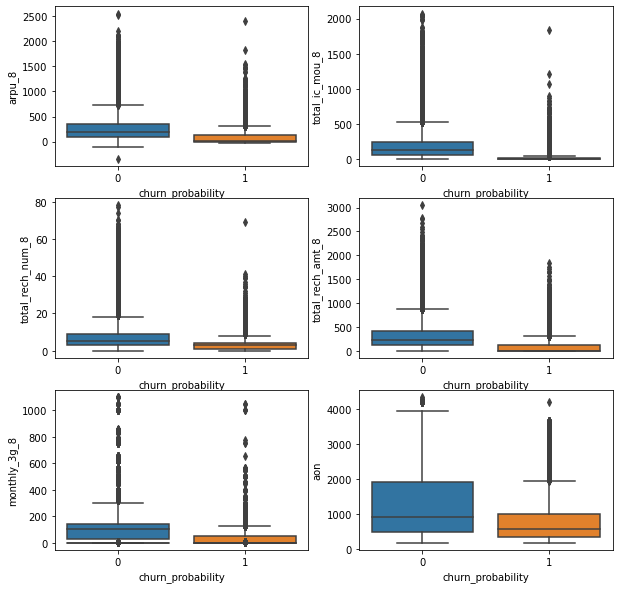

In [63]:
# Boxplot of 

plt.figure(figsize=[10,10])
plt.subplot(3, 2, 1)
sns.boxplot(df_telecom["churn_probability"], df_telecom["arpu_8"])
plt.subplot(3,2, 2)
sns.boxplot(df_telecom["churn_probability"], df_telecom["total_ic_mou_8"])
plt.subplot(3,2, 3)
sns.boxplot(df_telecom["churn_probability"], df_telecom["total_rech_num_8"])
plt.subplot(3,2, 4)
sns.boxplot(df_telecom["churn_probability"], df_telecom["total_rech_amt_8"])
plt.subplot(3,2, 5)
sns.boxplot(df_telecom["churn_probability"], df_telecom["max_rech_amt_8"])
plt.subplot(3,2, 5)
sns.boxplot(df_telecom["churn_probability"], df_telecom["monthly_3g_8"])
plt.subplot(3,2, 6)
sns.boxplot(df_telecom["churn_probability"], df_telecom["aon"])
plt.show()


### Conclusion:
Whenever a customer churns avaerage revenue per customer,total  minutes on call, total number of recharge ,recharge amount, monthly data usage,no. of days customer uses network all reduces

In [64]:
df_churn=df_telecom[df_telecom['churn_probability']==1]
df_no_churn=df_telecom[df_telecom['churn_probability']==0]

<AxesSubplot:xlabel='total_ic_mou_8'>

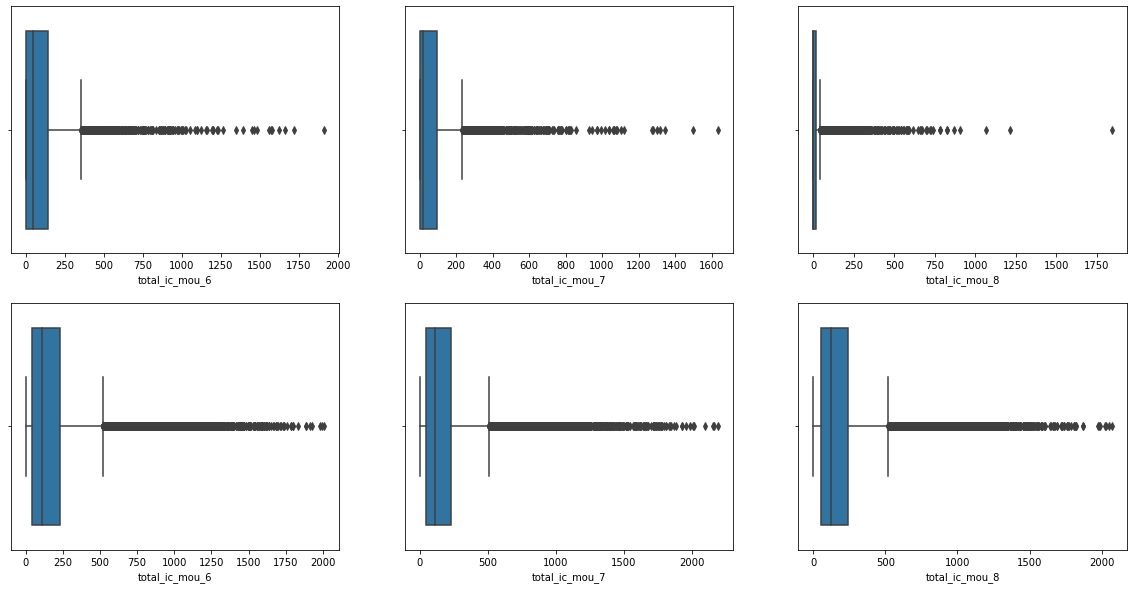

In [65]:
# variation of total mou over 3 months,1st column is for june, 2nd for july , 3rd for august
#1st row is for churned customers, 2nd row is not churned
plt.figure(figsize=[20,10])
plt.subplot(2, 3, 1)
sns.boxplot( df_churn["total_ic_mou_6"])
plt.subplot(2, 3, 2)
sns.boxplot( df_churn["total_ic_mou_7"])
plt.subplot(2, 3, 3)
sns.boxplot( df_churn["total_ic_mou_8"])
plt.subplot(2, 3, 4)
sns.boxplot( df_no_churn["total_ic_mou_6"])
plt.subplot(2, 3, 5)
sns.boxplot( df_no_churn["total_ic_mou_7"])
plt.subplot(2, 3, 6)
sns.boxplot( df_no_churn["total_ic_mou_8"])

### Conclusion:
We can see that for customers who do not churn, the incomming calls are almost the same over 3 months or increasing

But for the ones who have churned, no. of incomming calls are reduced.

<AxesSubplot:xlabel='total_og_mou_8'>

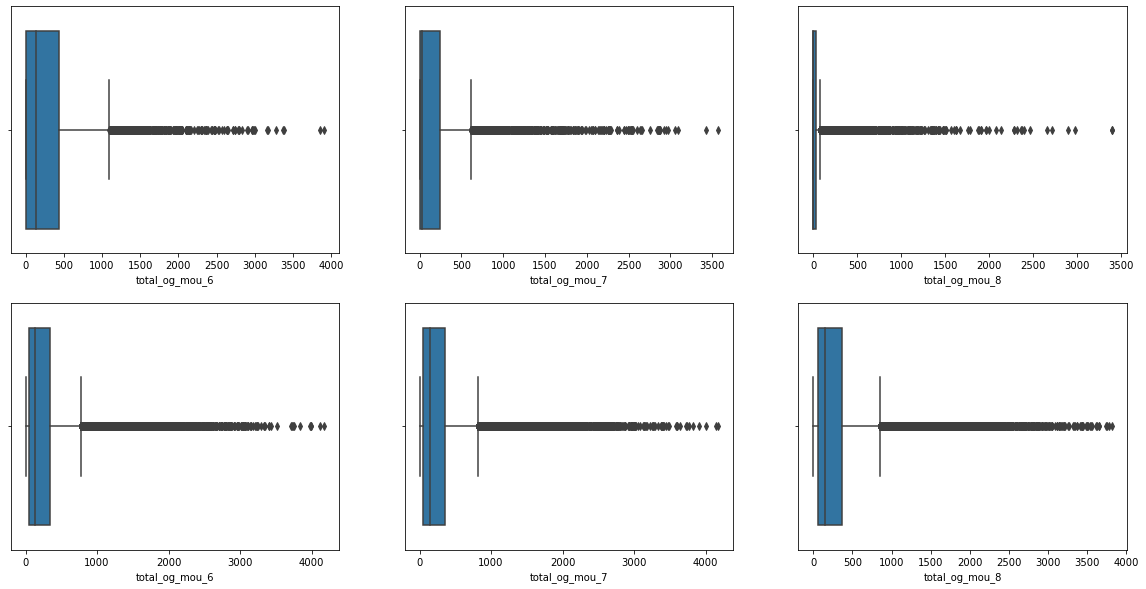

In [66]:
# variation of total outgoing mou over 3 months,1st column is for june, 2nd for july , 3rd for august
#1st row is for churned customers, 2nd row is not churned
plt.figure(figsize=[20,10])
plt.subplot(2, 3, 1)
sns.boxplot( df_churn["total_og_mou_6"])
plt.subplot(2, 3, 2)
sns.boxplot( df_churn["total_og_mou_7"])
plt.subplot(2, 3, 3)
sns.boxplot( df_churn["total_og_mou_8"])
plt.subplot(2, 3, 4)
sns.boxplot( df_no_churn["total_og_mou_6"])
plt.subplot(2, 3, 5)
sns.boxplot( df_no_churn["total_og_mou_7"])
plt.subplot(2, 3, 6)
sns.boxplot( df_no_churn["total_og_mou_8"])

<AxesSubplot:xlabel='total_rech_num_8'>

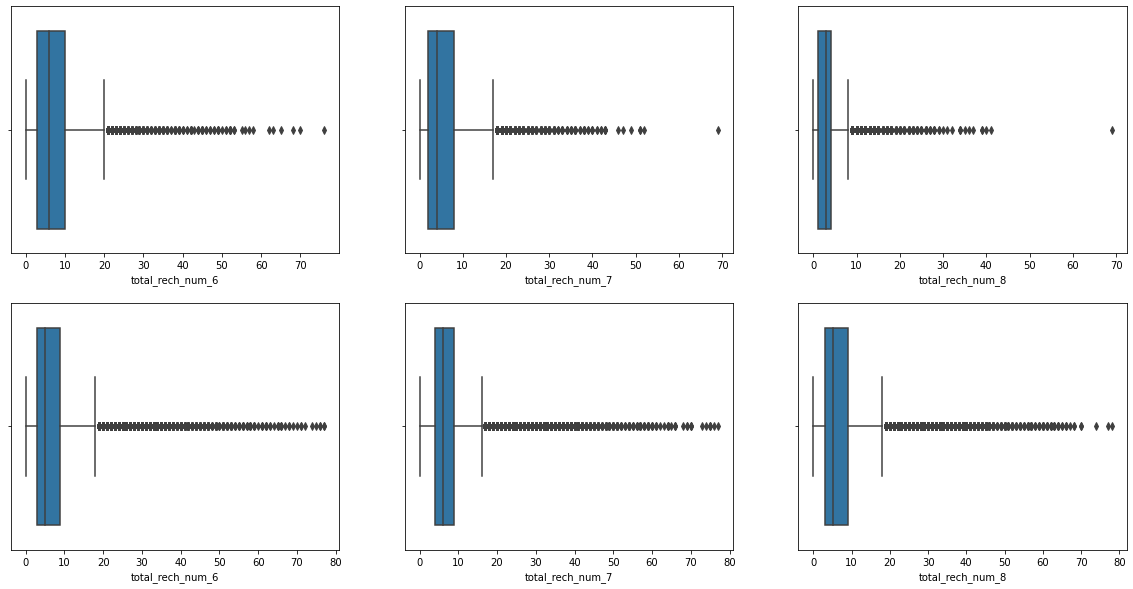

In [67]:
# variation of number of recharges over 3 months,1st column is for june, 2nd for july , 3rd for august
#1st row is for churned customers, 2nd row is not churned
plt.figure(figsize=[20,10])
plt.subplot(2, 3, 1)
sns.boxplot( df_churn["total_rech_num_6"])
plt.subplot(2, 3, 2)
sns.boxplot( df_churn["total_rech_num_7"])
plt.subplot(2, 3, 3)
sns.boxplot( df_churn["total_rech_num_8"])
plt.subplot(2, 3, 4)
sns.boxplot( df_no_churn["total_rech_num_6"])
plt.subplot(2, 3, 5)
sns.boxplot( df_no_churn["total_rech_num_7"])
plt.subplot(2, 3, 6)
sns.boxplot( df_no_churn["total_rech_num_8"])

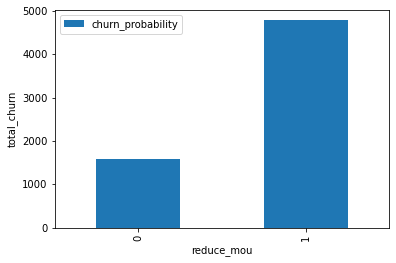

In [68]:
df_telecom.pivot_table(values='churn_probability', index='reduce_mou', aggfunc='sum').plot.bar()
plt.ylabel('total_churn')
plt.show()

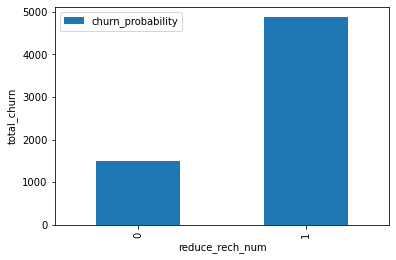

In [69]:
df_telecom.pivot_table(values='churn_probability', index='reduce_rech_num', aggfunc='sum').plot.bar()
plt.ylabel('total_churn')
plt.show()

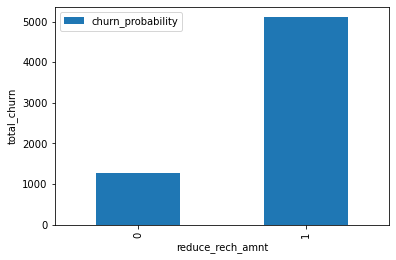

In [70]:
df_telecom.pivot_table(values='churn_probability', index='reduce_rech_amnt', aggfunc='sum').plot.bar()
plt.ylabel('total_churn')
plt.show()

### Conclusion:
For the customers where mou reduction , recharge number , rechrge amount reduction was found in action phase compared to good phase, maximum of them were churned

### Bivariate analysis

Text(0.5, 1.0, 'Not Churned customers')

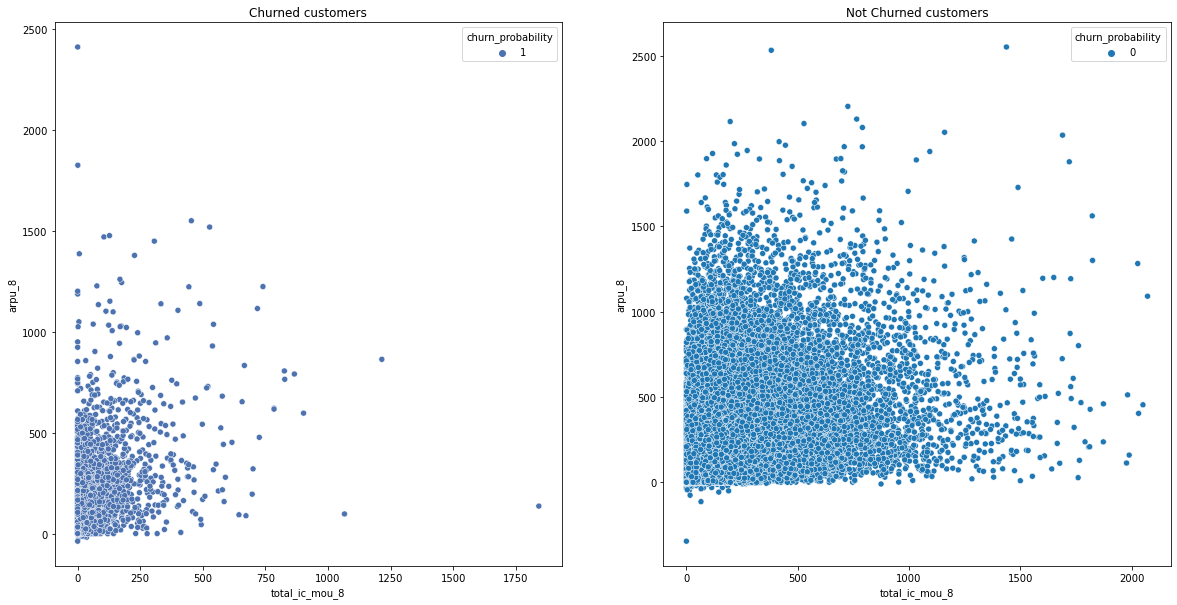

In [71]:
plt.figure(figsize=[20,10])
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_ic_mou_8',y='arpu_8',data=df_churn,hue='churn_probability',palette="deep")
plt.title("Churned customers")
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_ic_mou_8',y='arpu_8',data=df_no_churn,hue='churn_probability')
plt.title("Not Churned customers")

Text(0.5, 1.0, 'Not Churned customers')

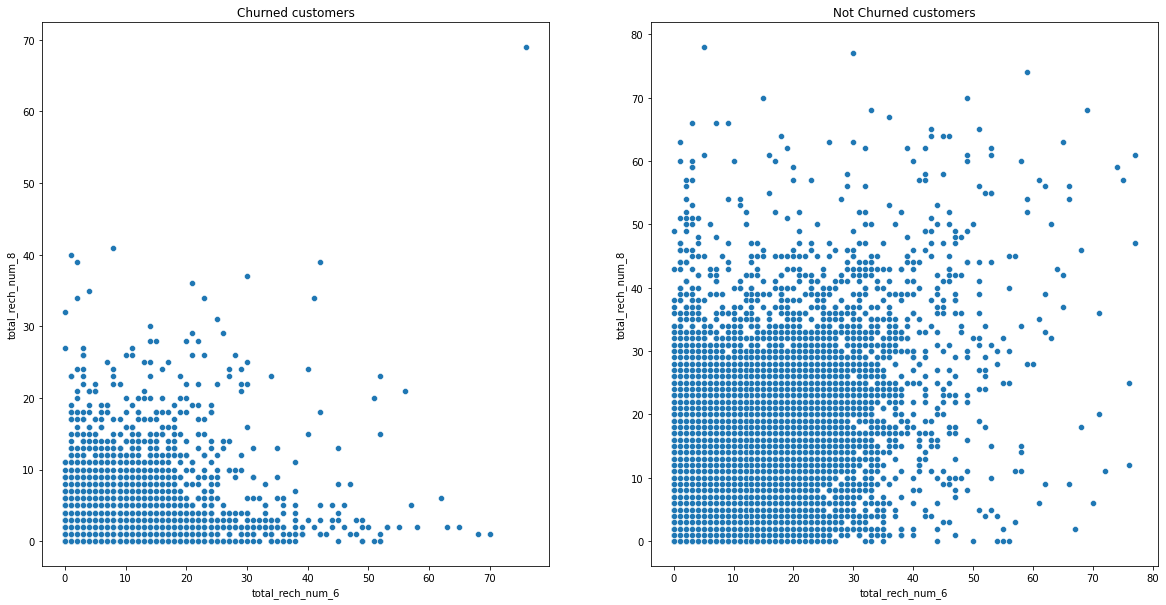

In [72]:
plt.figure(figsize=[20,10])
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_rech_num_6',y='total_rech_num_8',data=df_churn)
plt.title("Churned customers")
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_rech_num_6',y='total_rech_num_8',data=df_no_churn)
plt.title("Not Churned customers")

Text(0.5, 1.0, 'Not Churned customers')

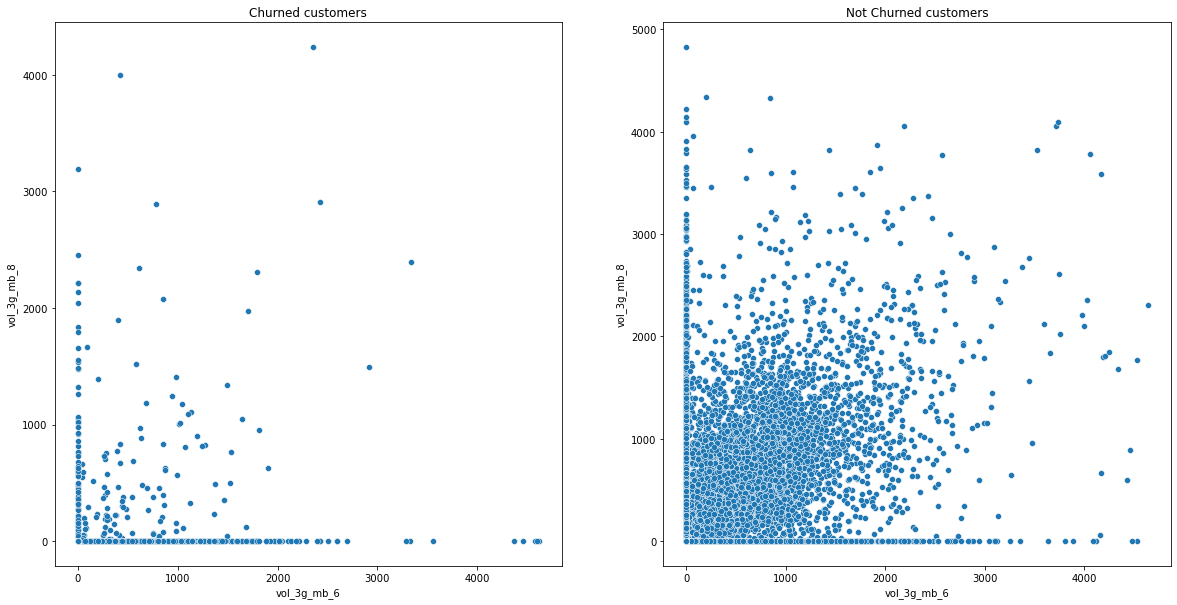

In [73]:
plt.figure(figsize=[20,10])
plt.subplot(1, 2, 1)
sns.scatterplot(x='vol_3g_mb_6',y='vol_3g_mb_8',data=df_churn)
plt.title("Churned customers")
plt.subplot(1, 2, 2)
sns.scatterplot(x='vol_3g_mb_6',y='vol_3g_mb_8',data=df_no_churn)
plt.title("Not Churned customers")

### Conclusion:
It can be clearly seen from the plots that for churned customer , average revenue and mou both are less

Volume of 3g data is less in action phase compared to good phase for churned customers

recharge numbers is less in action phase compared to good phase for churned customers

### Creation of dependant and independant variables

In [74]:
X_train=df_telecom.drop(['churn_probability'],axis=1)
y_train=df_telecom[['churn_probability']]

In [75]:
X_test=df_test

### Scaling features

In [76]:
cols=X_train.columns
scaler=MinMaxScaler()
X_train[cols]=scaler.fit_transform(X_train[cols])


In [77]:


X_test[cols]=scaler.transform(X_test[cols])

In [78]:
X_train.head()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,reduce_mou,reduce_rech_num,reduce_rech_amnt,reduce_arpu
0,0.121735,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.001722,0.000266,0.003015,0.009505,0.001461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003247,0.007446,0.001189,0.015908,0.041861,0.000342,0.006514,0.027437,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.072960,0.005005,0.000000,0.022878,0.0,0.0,0.019460,0.053172,0.000951,0.002136,0.003809,0.008535,0.010054,0.000000,0.000000,0.000000,0.001696,0.011865,0.012377,0.000000,0.026063,0.000743,0.0,0.0,0.0,0.012110,0.046026,0.025855,0.005900,0.024242,0.019586,0.0,0.0,0.385965,0.0,0.0,0.0,0.039586,0.025091,0.000000,0.038961,0.025974,0.025641,0.023692,0.021090,0.003284,0.058088,0.059091,0.009107,0.076561,0.078788,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.427712,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0
1,0.133964,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408273,0.545704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.244121,0.261027,0.000000,0.0,0.0,0.000000,0.007371,0.008298,0.001477,0.019757,0.011537,0.006594,0.000929,0.004522,0.010403,0.001789,0.018900,0.012538,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.001714,0.018026,0.012091,0.0,0.0,0.005848,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.038961,0.051948,0.064103,0.000000,0.047047,0.016420,0.000000,0.131818,0.045537,0.000000,0.000000,0.000000,0.000000,0.146444,0.000000,0.0,0.000841,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.127496,0.0,0.0,0.0,0.000000,0.013653,0.000000,0.0,0.0,1.0,1.0
2,0.119137,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000409,0.000000,0.013743,0.000000,0.000000,0.000000,0.000000,0.000000,0.044667,0.000000,0.000000,0.010625,0.006025,0.000000,0.000000,0.000989,0.000000,0.010054,0.027927,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.025714,0.010963,0.000000,0.000000,0.0,0.0,0.013536,0.023832,0.000000,0.003964,0.006375,0.007111,0.013979,0.000000,0.000000,0.000000,0.049091,0.015019,0.015032,0.036668,0.000000,0.000000,0.0,0.0,0.0,0.048552,0.004139,0.010867,0.061931,0.015462,0.017693,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.009546,0.025974,0.051948,0.025641,0.021538,0.038936,0.000000,0.062556,0.063636,0.000000,0.082450,0.0606

### Prediction of test dataset

### Modelling with PCA

In [79]:
#instantiate PCA
pca_telecom = PCA(random_state=100)

In [80]:
pca_telecom.fit(X_train)

PCA(random_state=100)

In [81]:
var_cumu = np.cumsum(pca_telecom.explained_variance_ratio_)

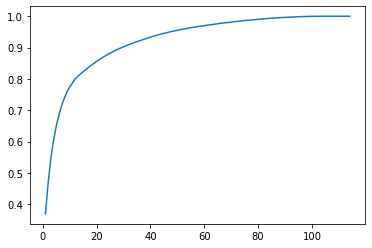

In [82]:
# Plot scree plot to know how manu components explain max variance
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [83]:
# 70 components explain 95% variance
pca_70 = PCA(n_components=70, random_state=100)
X_train_pca = pca_70.fit_transform(X_train)

In [84]:
# transform test data to pca components
X_test_pca=pca_70.transform(X_test)

### Apply logistic regression on PCA

In [85]:
logistic_pca = LogisticRegression().fit(X_train_pca, y_train)

In [86]:
y_train_pred=logistic_pca.predict(X_train_pca)

In [87]:
metrics.confusion_matrix(y_train, y_train_pred)

array([[54482,   791],
       [ 4379,  1985]], dtype=int64)

In [88]:
metrics.accuracy_score(y_train, y_train_pred)

0.9161218099518147

In [89]:
y_test_pred=logistic_pca.predict(X_test_pca)

In [90]:
df_test['churn_probability']=y_test_pred

In [91]:
df_test.head()

,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,reduce_mou,reduce_rech_num,reduce_rech_amnt,reduce_arpu,churn_probability
0,0.141383,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.019216,0.019990,0.010334,0.006453,0.005243,0.000000,0.106627,0.000000,0.0,0.000000,0.00055,0.018546,0.020755,0.013409,0.002369,0.000000,0.000694,0.014602,0.002614,0.009436,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000247,0.00000,0.0,0.0,0.022031,0.012566,0.015187,0.026659,0.038873,0.024082,0.005666,0.000690,0.000000,0.000000,0.021227,0.020204,0.015783,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000584,0.001736,0.007392,0.020793,0.019909,0.017509,0.6,0.21519,0.22807,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.064935,0.064935,0.051282,0.031692,0.029202,0.019704,0.044683,0.027273,0.027322,0.035336,0.036364,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363724,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0
1,0.243706,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.058321,0.018832,0.269954,0.354399,0.236582,0.005524,0.000000,0.000000,0.0,0.000000,0.00000,0.237100,0.296766,0.180929,0.000000,0.000000,0.000000,0.000000,0.008087,0.006312,0.0,0.0,0.0,0.0,0.0,0.159681,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.131758,0.159041,0.108931,0.017571,0.027892,0.002860,0.109886,0.003955,0.000000,0.000000,0.094504,0.071518,0.093884,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.020877,0.000000,0.147655,0.155233,0.136010,0.0,0.00000,0.00000,0.366312,0.706069,0.401474,0.0,0.0,0.000000,0.064935,0.051948,0.064103,0.153846,0.162232,0.164204,0.223414,0.227273,0.227687,0.294464,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566033,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.376734,0.043806,0.309855,0.084159,0.039389,0.130345,0.14093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.077922,0.116883,0.064103,0.153846,0.324465,0.328407

In [92]:
test_data=pd.read_csv("test.csv")
test_data['churn_probability']=df_test['churn_probability']

In [93]:
output=test_data[['id','churn_probability']]

In [94]:
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [95]:
output.to_csv('submission_3_12thjun.csv',index=False)

### Apply random forest on PCA

In [101]:
rf_telecom = RandomForestClassifier(max_depth=20,min_samples_split=100,min_samples_leaf=50,random_state=100,max_features=10)

In [102]:
rf_telecom.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, random_state=100)

In [103]:
y_train_pred=rf_telecom.predict(X_train_pca)

In [104]:
metrics.accuracy_score(y_train,y_train_pred)

0.9215568570825965

### Decision tree with PCA

In [ ]:
params = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150],
}


dt_telecom = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_telecom, 
                           param_grid = params, 
                           scoring= 'accuracy',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)


grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
